# **TP ML - Regression Prediction de vente**

> **Nom:** BOPE SAIDI MEDARD ARNAULD
> **Promotion:** Master Complémentaire - ISTAT Kolwezi

--------------------
## **I . Context:**
--------------------

Une prévision des ventes est une prédiction du chiffre d'affaires futur basée sur les données historiques, les tendances du secteur et l'état du pipeline de ventes actuel. Les entreprises utilisent les prévisions de ventes pour estimer les totaux des ventes hebdomadaires, mensuelles, trimestrielles et annuelles. Il est extrêmement important pour une entreprise d'établir des prévisions de vente précises, car elles apportent une valeur ajoutée à l'ensemble de l'organisation et aident les différents secteurs verticaux à définir leur plan d'action futur. Les prévisions aident une organisation à planifier ses opérations de vente par région et fournissent des informations précieuses à l'équipe chargée de la chaîne d'approvisionnement en ce qui concerne l'achat de biens et de matériaux. 
Un processus de prévision des ventes précis présente de nombreux avantages, notamment l'amélioration de la prise de décision concernant l'avenir et la réduction du pipeline de ventes et des risques liés aux prévisions. En outre, il permet de réduire le temps consacré à la planification de la couverture du territoire et d'établir des points de référence qui peuvent être utilisés pour évaluer les tendances à l'avenir.

---------------------------
## **Objectifs:**
----------------------------

l'objectif principal de ce travail, est d'analyser les données de vente du SuperKart qui est une entreprise qui possède une chaîne de supermarchés et de magasins d'alimentation proposant une large gamme de produits. afin de prédire le chiffre d'affaires futur de ses différents points de vente, d'établir une stratégie de vente dans les différentes villes et de planifier ses stocks en conséquence.

---------------------------------
## **Description de Données:**
---------------------------------

Les données contiennent les différents attributs des divers produits et magasins. Le dictionnaire de données détaillé est donné ci-dessous.

* Product_Id - l'identifiant unique de chaque produit, chaque identifiant commençant par deux lettres suivies d'un chiffre.
* Product_Weight - le poids de chaque produit
* Product_Sugar_Content - la teneur en sucre de chaque produit (faible teneur en sucre, ordinaire, sans sucre)
* Product_Allocated_Area - le rapport entre la surface d'exposition de chaque produit et la surface d'exposition totale de tous les produits d'un magasin
* Product_Type - une grande catégorie pour chaque produit comme la viande, les snacks, les boissons fortes, les produits laitiers, les conserves, les boissons non alcoolisées, la santé et l'hygiène, les produits de boulangerie, le pain, le petit-déjeuner, les produits surgelés, les fruits et légumes, les produits ménagers, les produits de la mer, les féculents, etc.
* Product_MRP - le prix de détail maximal de chaque produit
* Store_Id - identifiant unique de chaque magasin
* Store_Establishment_Year - l'année de création du magasin
* Store_Size - la taille du magasin en fonction du nombre de pieds carrés (haut, moyen, bas)
* Store_Location_City_Type - Le type de ville dans laquelle le magasin est situé : Tier 1, Tier 2 et Tier 3. Le niveau 1 comprend les villes où le niveau de vie est comparativement plus élevé que dans les niveaux 2 et 3.
* Store_Type - Le type de magasin dépend des produits qui y sont vendus, comme les grands magasins, les supermarchés de type 1, les supermarchés de type 2 et les magasins d'alimentation.
* Product_Store_Sales_Total - Recettes totales générées par la vente de ce produit particulier dans ce magasin particulier

## **II. Importation des bibliothèques nécessaires**

In [1]:
# Bibliothèques pour aider à la lecture et à la manipulation des données
import numpy as np
import pandas as pd

# Bibliothèque pour diviser les données
from sklearn.model_selection import train_test_split

# Bibliothèques qui vont vous nous aider à  visualiser les données
import matplotlib.pyplot as plt
import seaborn as sns

# Importation de bibliothèques pour la construction de modèles de régression linéaire
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Pour les modeles de reseaux de neurons
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

### **III. Importation de l'ensemble de données**

In [2]:
# Lecture du fichier csv qui constitue notre dataset
df = pd.read_csv("Data/SuperKart.csv")

In [3]:
# Copier des données dans une autre variable pour éviter toute modification des données d'origine
data = df.copy()

### **Affichage des 5 premières et 5 dernières lignes de notre dataset**

In [4]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


**Observation:**

* Les ventes du magasin sont indiquées par la variable **Produit_Magasin_Ventes_Total** qui est la variable cible et le reste des variables sont des variables indépendantes sur la base desquelles nous prédirons les ventes totales des magasins pour le trimestre à venir.

In [5]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Comprendre la dimension de l'ensemble de données**

In [6]:
print(f"il ya {data.shape[0]} lignes et {data.shape[1]} colonnes.")

il ya 8763 lignes et 12 colonnes.


### **Vérification des types de données des colonnes de la dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:**
* Product_Weight, Product_Allocated_Area, Product_MRP, Store_Establishment_Year, and Product_Store_Sales_Total sont les colonnes numériques tandis que les autres sont les colonnes d'objets.
* Il y a un total de **8763 observations non nulles dans chacune des colonnes**. Cela indique qu'il n'y a **aucune valeur manquante** dans les données.

### **Vérification des valeurs manquantes dans l'ensemble de données**

In [8]:
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observation:**
* Il n'y a pas de valeurs manquantes dans les données.

In [9]:
# Vérification des valeurs en double
data.duplicated().sum()

np.int64(0)

**Observation:**
* Il n'y a pas de valeurs en double dans les données. 

## **IV. Analyse exploratoire des données - EDA**

**Vérifions le résumé statistique des données.**

In [10]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- Il y a 16 types de produits différents et les fruits et légumes ont été vendus le plus grand nombre de fois (1249).
- L'ensemble de données comprend 4 magasins uniques.
- Le revenu généré par la vente d'un produit particulier dans un certain point de vente varie de 33 à 8000, 50 % des valeurs étant supérieures à 2762.
- Le chiffre d'affaires moyen des magasins est d'environ 34 640 USD, tandis que la médiane du chiffre d'affaires des magasins est d'environ 34 523 USD. Cela indique que la distribution de **Product_Store_Sales_Total** n'est que légèrement asymétrique vers la droite.

**Vérifions le nombre de chaque catégorie unique dans chacune des variables catégorielles.**

In [11]:
# Établir une liste de toutes les variables catégorielles
cat_col = list(data.select_dtypes("object").columns)

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Product_Id
FD306     1
FD6114    1
FD7839    1
FD5075    1
FD8233    1
         ..
FD1387    1
FD1231    1
FD5276    1
FD8553    1
FD6027    1
Name: count, Length: 8763, dtype: int64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
O

**Observations:**
- Les produits à faible teneur en sucre sont plus nombreux que les produits à faible teneur en sucre et réguliers dans les données.

In [12]:
# Remplacement de reg par Regular dans la fonctionnalité Product_Sugar_Content car c'est la meme chose
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [13]:
data.Product_Sugar_Content.value_counts()

Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

**Observation:**
- Nous pouvons voir que la colonne Product_Id contient deux caractères suivis d'un nombre. Approfondissons la question et voyons s'il existe ou non une relation avec les autres colonnes.

In [14]:
#  Extraction des deux premiers caractères de la colonne Product_Id et stockage dans une autre colonne
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [15]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [16]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

**Observation:**
- Nous pouvons voir que FD est utilisé dans le Product_Id des produits alimentaires.

In [17]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

**Observation:**
- Nous pouvons voir que DR est utilisé dans le Product_Id des boissons.

In [18]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Observation:**
- Nous pouvons voir que NC est utilisé dans le Product_Id des boissons.

**La colonne Product_Id n'apportera aucune valeur ajoutée à notre analyse.**

In [19]:
# Suppression de la colonne Product_id
data = data.drop(["Product_Id"], axis = 1)

In [20]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


### **Univariate Analysis**

In [21]:
# Fonction permettant de tracer un boxplot et un histogramme à la même échelle

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Fonction pour afficher un boxplot et un histogramme côte à côte.
    
    Paramètres:
        data: DataFrame contenant les données
        feature: Colonne à visualiser
        figsize: Taille de la figure (par défaut (12,7))
        kde: Booléen pour afficher une courbe de densité (par défaut False)
        bins: Nombre de bins pour l'histogramme (par défaut None)
    """
    # Création de la figure avec 2 sous-graphiques (boxplot + histogramme)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )
    
    # Boxplot
    sns.boxplot(
        data=data, 
        x=feature, 
        ax=ax_box2, 
        showmeans=True, 
        color="violet"
    )
    
    # Histogramme
    if bins:
        sns.histplot(
            data=data, 
            x=feature, 
            kde=kde, 
            ax=ax_hist2, 
            bins=bins, 
            color="lightblue"  # Modification: 'palette' non supportée, remplacé par 'color'
        )
    else:
        sns.histplot(
            data=data, 
            x=feature, 
            kde=kde, 
            ax=ax_hist2,
            color="lightblue"
        )
    
    # Lignes verticales pour moyenne (--) et médiane (-)
    ax_hist2.axvline(
        data[feature].mean(), 
        color="green", 
        linestyle="--",
        label="Moyenne"
    )
    ax_hist2.axvline(
        data[feature].median(), 
        color="black", 
        linestyle="-",
        label="Médiane"
    )
    ax_hist2.legend()  # Ajout d'une légende                  

**Product_Weight**

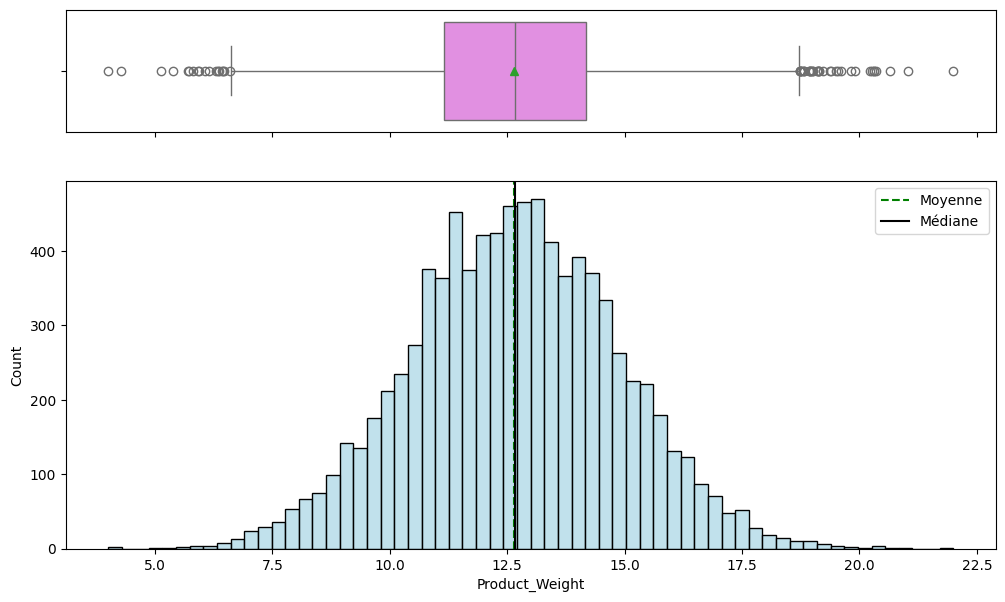

In [22]:
histogram_boxplot(data, "Product_Weight")

**Observation:**
- Le poids du produit est uniformément réparti, la moyenne et la médiane se situant autour de 12,5.

**Product_Allocated_Area**

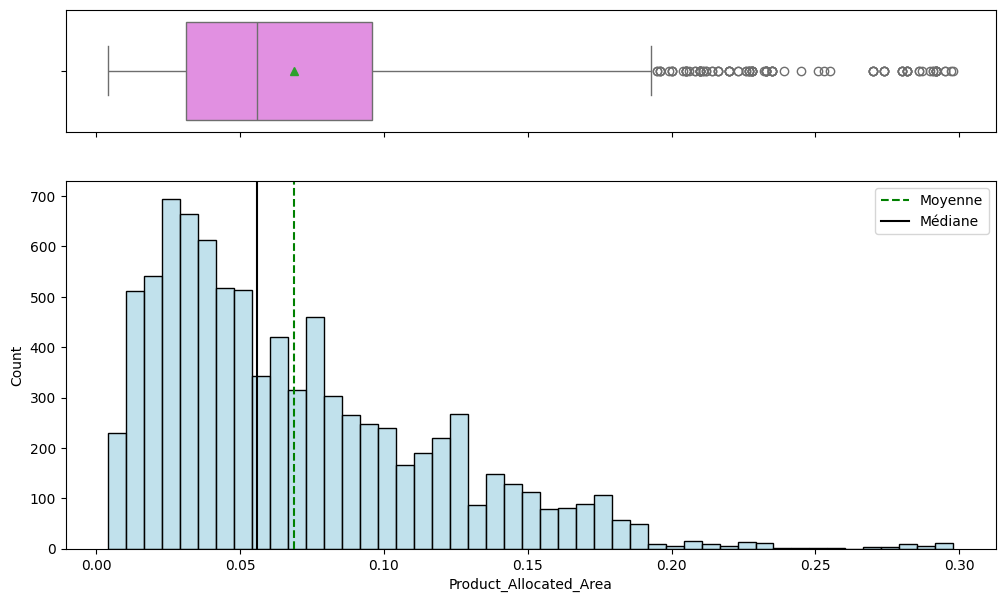

In [23]:
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:**
- La distribution est asymétrique à droite, la médiane se situant autour de 0,05.

**Product_MRP**

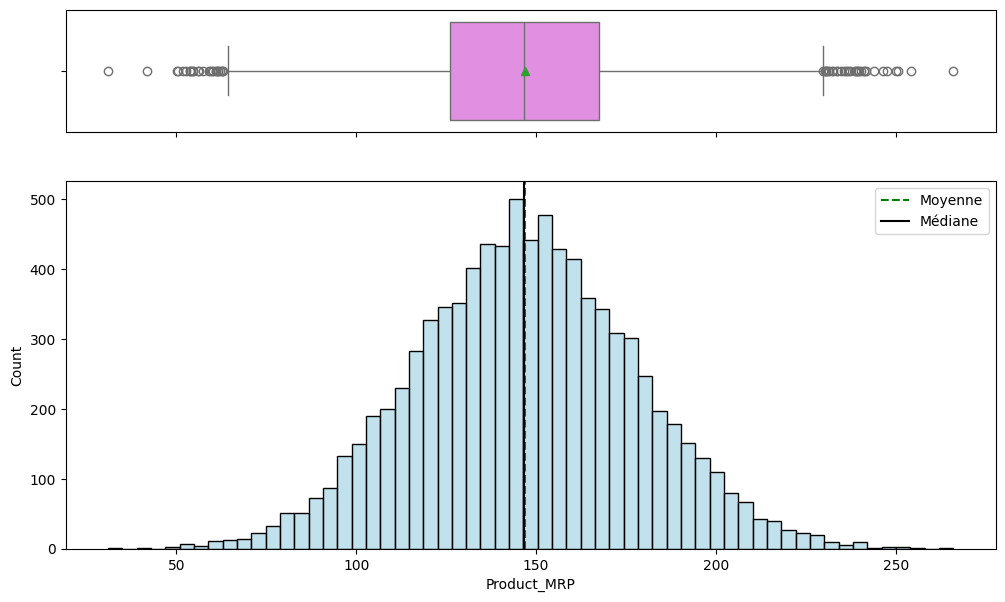

In [24]:
histogram_boxplot(data, "Product_MRP")

**Observation:**
- Le produit MRP est uniformément distribué, la moyenne et la médiane se situant autour de 150.

**Product_Store_Sales_Total**

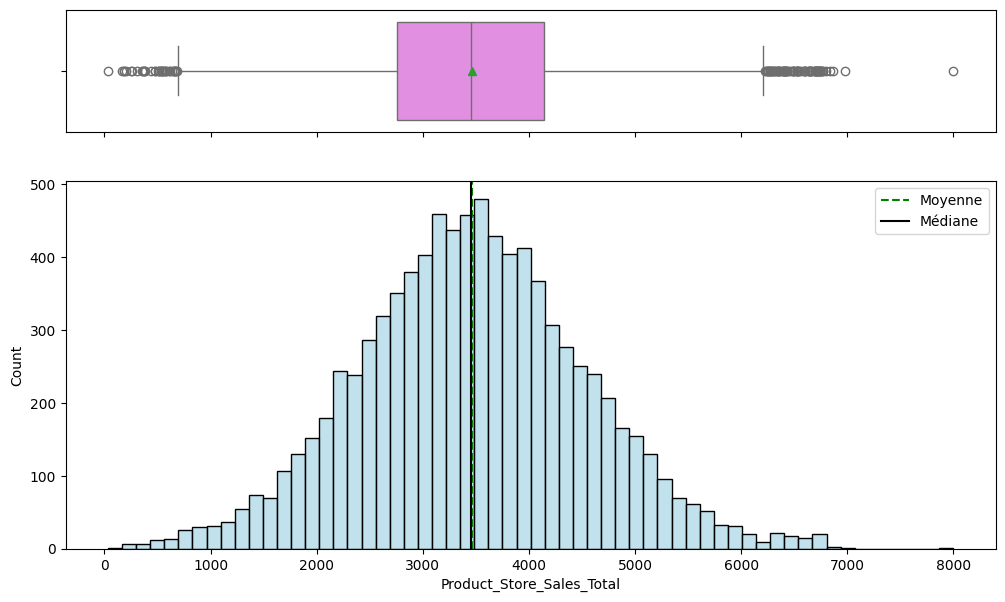

In [25]:
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
- Les recettes générées par chaque produit dans un magasin donné sont normalement distribuées, la moyenne et la médiane se situant autour de 3500.

In [26]:
# Fonction permettant de créer des diagrammes à barres étiquetés

def labeled_barplot(data, feature, perc=False, n=None, figsize=None, orientation='vertical'):
    """
    Génère un diagramme à barres annoté avec valeurs absolues ou pourcentages.

    Paramètres:
    -----------
    data : DataFrame
        Jeu de données pandas
    feature : str
        Nom de la colonne catégorielle à visualiser
    perc : bool (default=False)
        Si True, affiche les pourcentages. Si False, affiche les effectifs
    n : int (default=None)
        Nombre de catégories à afficher (None pour toutes)
    figsize : tuple (default=None)
        Taille de la figure (width, height)
    orientation : str (default='vertical')
        Orientation du graphique ('vertical' ou 'horizontal')
    """
    # Calcul des valeurs de base
    total = len(data[feature])
    value_counts = data[feature].value_counts()
    
    # Détermination du nombre de catégories à afficher
    if n is None:
        n = len(value_counts)
    
    # Tri des valeurs
    sorted_values = value_counts.sort_values(ascending=False).index[:n]
    
    # Configuration de la taille (correction ici)
    if figsize is None:
        if orientation == 'vertical':
            figsize = (min(12, n + 2), 8)  # Parenthèse fermante ajoutée
        else:
            figsize = (10, min(8, n * 0.7))
    
    plt.figure(figsize=figsize)
    
    # Création du plot selon l'orientation
    if orientation == 'vertical':
        ax = sns.countplot(data=data, 
                          x=feature, 
                          order=sorted_values,
                          palette="viridis")
        plt.xticks(rotation=45, ha='right')
    else:
        ax = sns.countplot(data=data, 
                          y=feature, 
                          order=sorted_values,
                          palette="viridis")
    
    # Ajout des annotations
    for p in ax.patches:
        if orientation == 'vertical':
            height = p.get_height()
            x = p.get_x() + p.get_width()/2
            y = height
        else:
            width = p.get_width()
            y = p.get_y() + p.get_height()/2
            x = width
        
        value = width if orientation == 'horizontal' else height
        label = f"{100*value/total:.1f}%" if perc else f"{int(value)}"
        
        ax.annotate(label,
                   (x, y),
                   ha='center',
                   va='center',
                   fontsize=10,
                   xytext=(0, 5),
                   textcoords='offset points')
    
    plt.tight_layout()
    plt.show()


**Product_Sugar_Content**

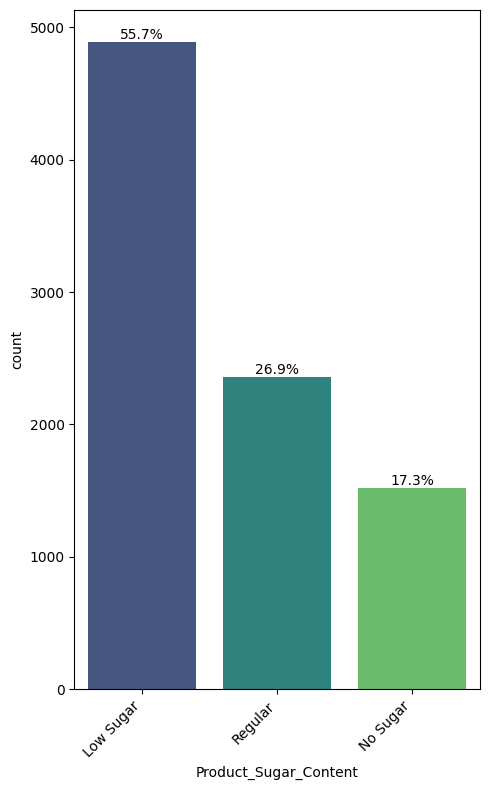

In [27]:
labeled_barplot(data, "Product_Sugar_Content", perc = True)

**Observations:**
- Environ 56 % des produits ont une faible teneur en sucre, suivis par 27 % de produits ayant une teneur en sucre normale.
- Environ 17 % des produits ne contiennent pas de sucre.

**Product_Type**

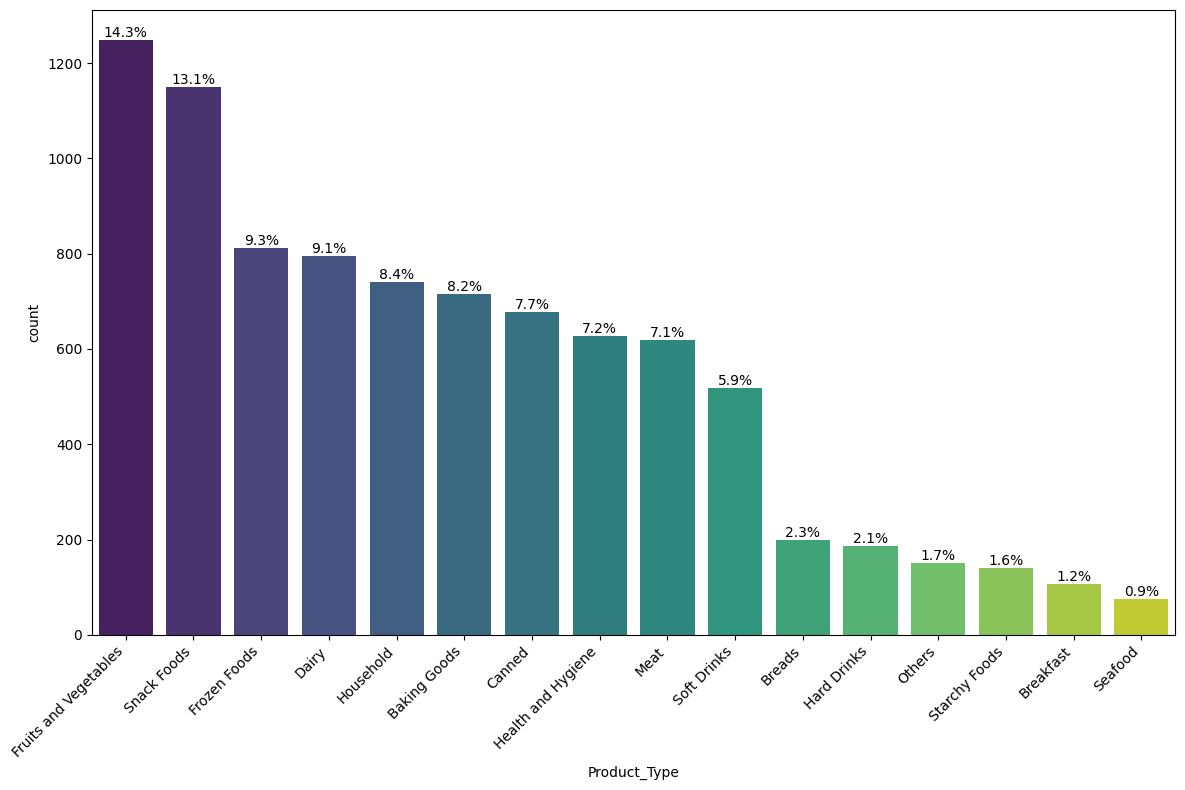

In [28]:
labeled_barplot(data, "Product_Type", perc = True)

**Observations:**
- Les fruits et légumes (14%) et les snacks (13%) ont été achetés le plus grand nombre de fois dans tous les magasins confondus.
- Seafood (1%) ont été achetés le moins souvent.
- Le type de produit le plus acheté, à savoir les fruits et légumes, a été acheté 14 fois plus souvent que le type de produit le moins acheté, à savoir les fruits de mer (seafood).

**Store_Id**

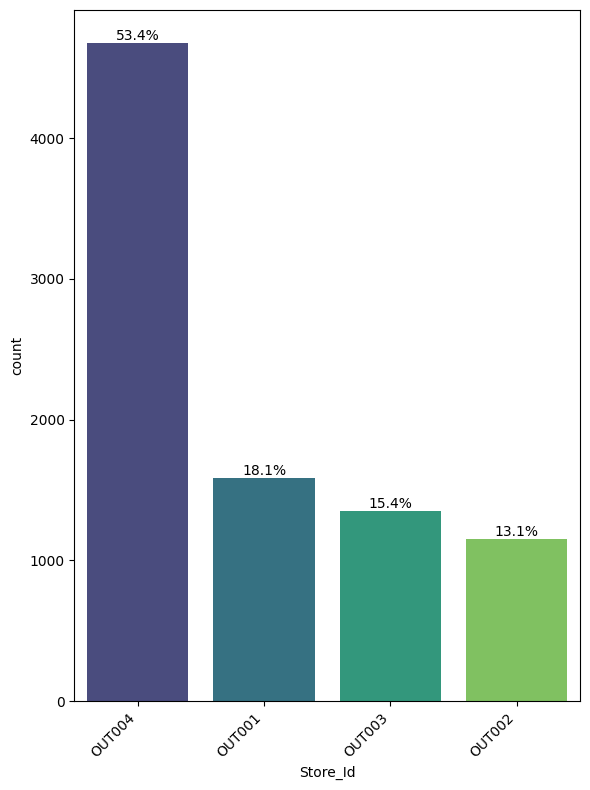

In [29]:
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**
- Environ 53% des produits sont vendus par le point de vente OUT004. Un nombre presque égal de produits a été vendu dans chacun des trois autres magasins.
- Par rapport aux quatre Store_Ids, les produits vendus par le point de vente OUT002 sont peu nombreux.

**Store_Size**

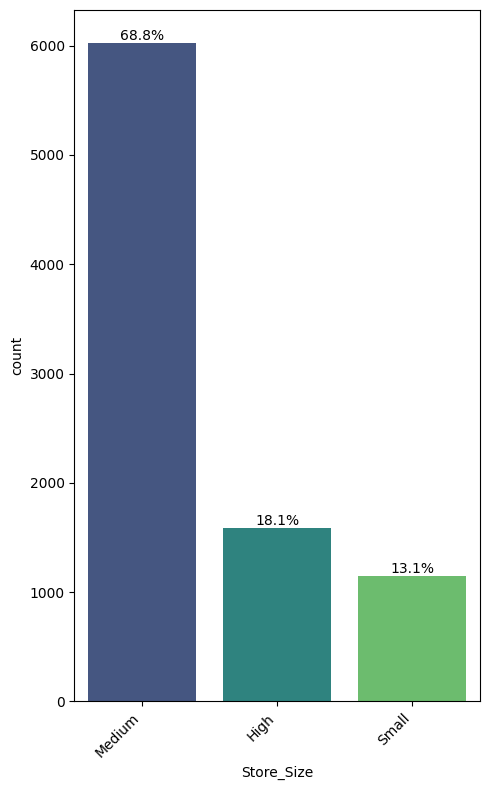

In [30]:
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**
- Environ 69% des produits ont été vendus dans des magasins de taille moyenne.
- Les produits vendus dans les magasins de grande et de petite taille sont à peu près de la même taille.

**Store_Location_City_Type**

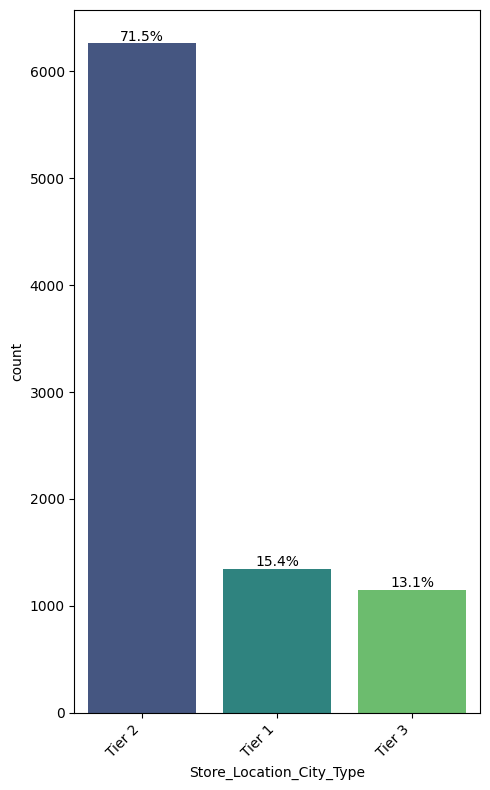

In [31]:
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**
- Environ 72 % des produits ont été vendus dans des magasins situés dans des villes de niveau 2.
- Les produits vendus dans les magasins situés dans les villes de niveau 1 et de niveau 3 sont pratiquement les mêmes.

**Store_Type**

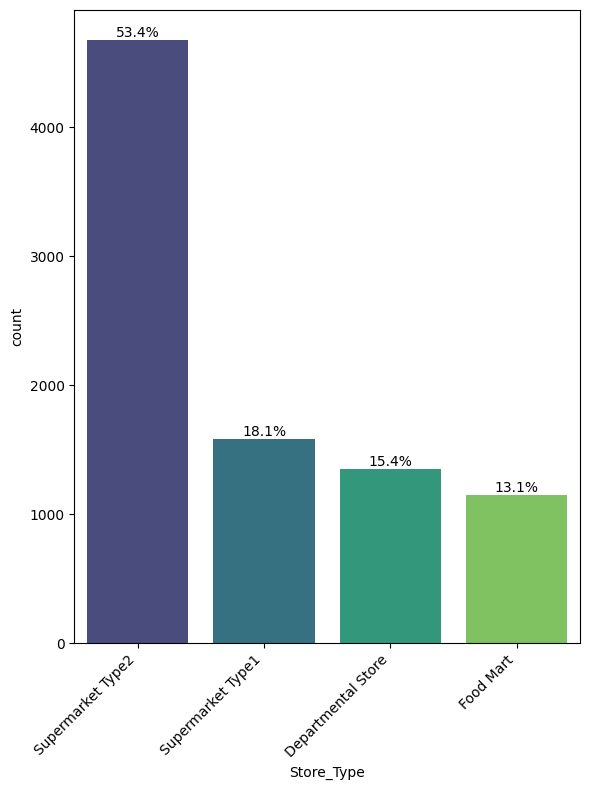

In [32]:
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**
- Environ 53% des produits ont été vendus dans des magasins de type supermarché2.
- Les produits vendus par les supermarchés de type 1, les magasins d'alimentation et les grands magasins sont pratiquement les mêmes.

### **Analyse bivariée**

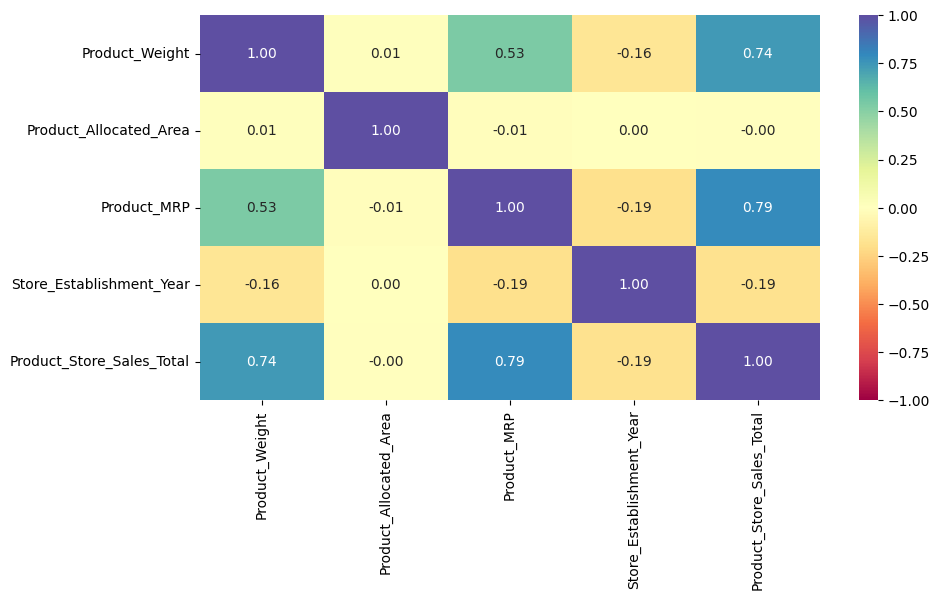

In [33]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Observations:**
- Product weight and product MRP sont fortement corrélés avec notre variable cible, à savoir **Product_Store_Sales_Total.**
- Product weight and product MRP sont modérément corrélés l'un à l'autre.
- Il n'y a pas beaucoup de corrélation entre les autres variables.
- Store_Establishment_Year est fortement corrélé négativement avec notre variable cible, à savoir Product_Store_Sales_Total.

**Vérifions la distribution de notre variable cible, c'est-à-dire le total des ventes du magasin de produits, avec les colonnes numériques.** 

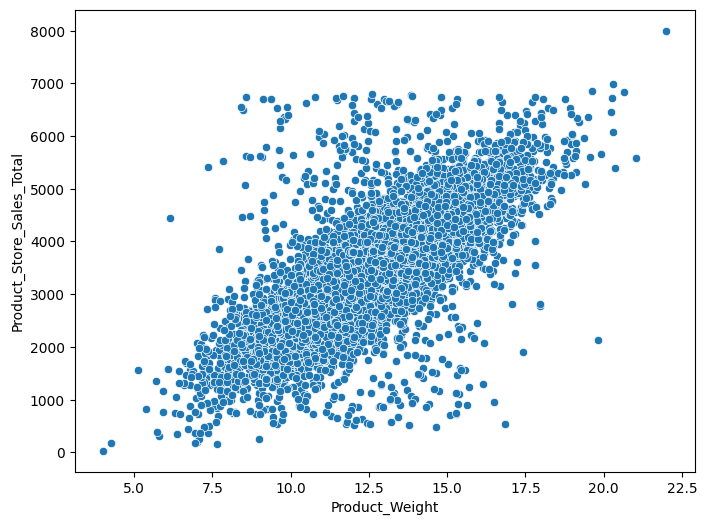

In [34]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_Weight and Product_Store_Sales_Total sont presque linéairement corrélés l'un à l'autre.

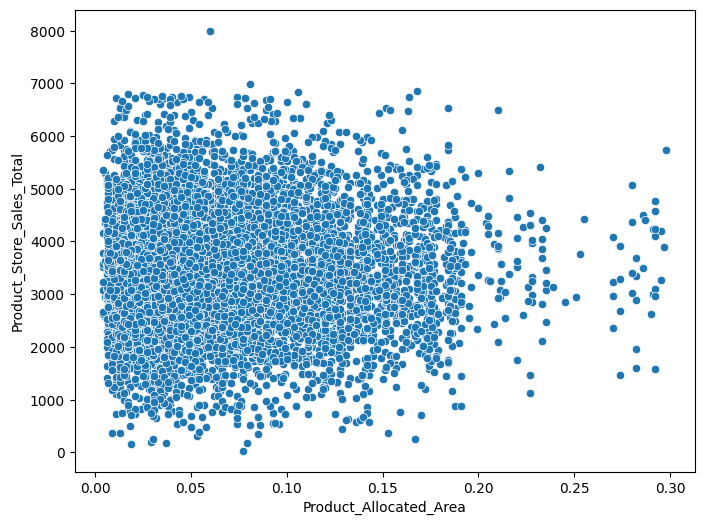

In [35]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- l ne semble pas y avoir de relation entre Product_Allocated_Area et Product_Store_Sales_Total.

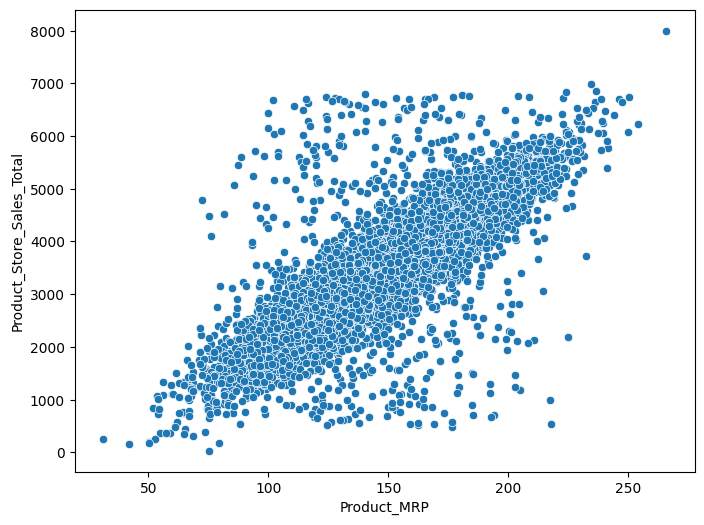

In [36]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_MRP and Product_Store_Sales_Total sont en corrélation presque linéaire les uns avec les autres.

**Voyons quel type de produit est à l'origine de la majeure partie des recettes de l'entreprise.**

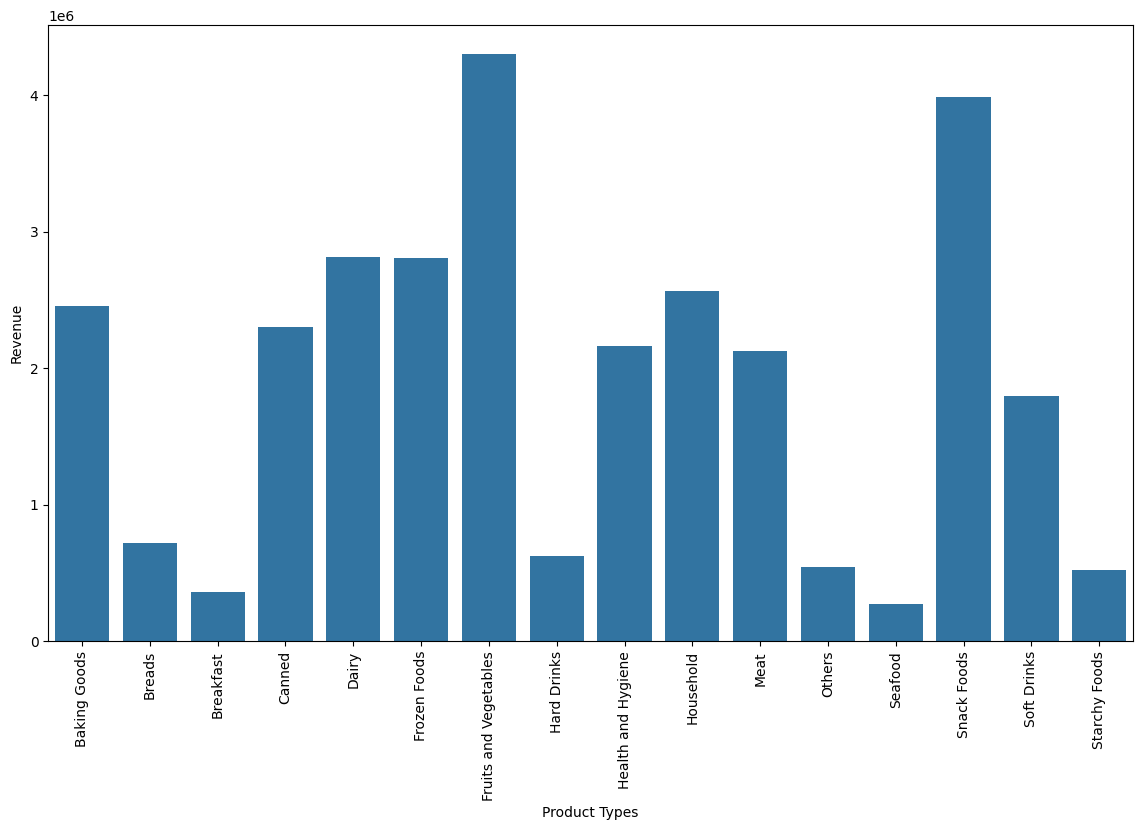

In [37]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

**Observations:**
- Fruits and vegetables and snack foods sont ceux qui contribuent le plus aux recettes de l'entreprise (SuperKart).

## **V. Prétraitement des données**

### **Ingénierie des fonctionnalités**

**Un magasin qui existe depuis longtemps est plus digne de confiance qu'un magasin nouvellement créé. D'un autre côté, les magasins plus anciens peuvent parfois manquer d'infrastructure s'ils ne font pas l'objet d'une attention particulière. Calculons donc l'âge actuel du magasin et intégrons-le dans notre modèle.** 

In [38]:
# Ancienneté
data["Store_Age_Years"] = 2025 - data.Store_Establishment_Year

**Nous avons 16 types de produits différents dans notre ensemble de données. Nous allons donc créer deux grandes catégories, les produits périssables et les produits non périssables, afin de réduire le nombre de types de produits.**

In [39]:
perissables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [40]:
def change(x):
    if x in perissables:
        return "Périssables"
    else:
        return "Non Périssables"


data.Product_Type.apply(change)

0       Non Périssables
1           Périssables
2       Non Périssables
3       Non Périssables
4       Non Périssables
             ...       
8758    Non Périssables
8759    Non Périssables
8760    Non Périssables
8761    Non Périssables
8762    Non Périssables
Name: Product_Type, Length: 8763, dtype: object

In [41]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perissables:
        change1.append("Périssables")
    else:
        change1.append("Non Périssables")

In [42]:
data["Product_Type_Category"] = pd.Series(change1)

In [43]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Périssables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Périssables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Périssables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Périssables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Périssables


### **Vérification des valeurs aberrantes**

- Vérifions si les données sont aberrantes.

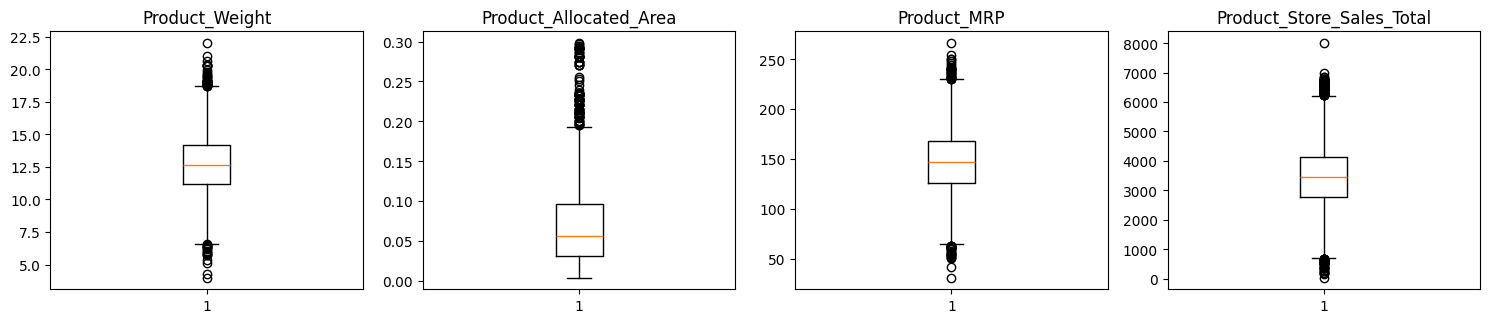

In [44]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- Les données comportent un certain nombre de valeurs aberrantes.
- Cependant, nous ne les traiterons pas comme des valeurs propres.

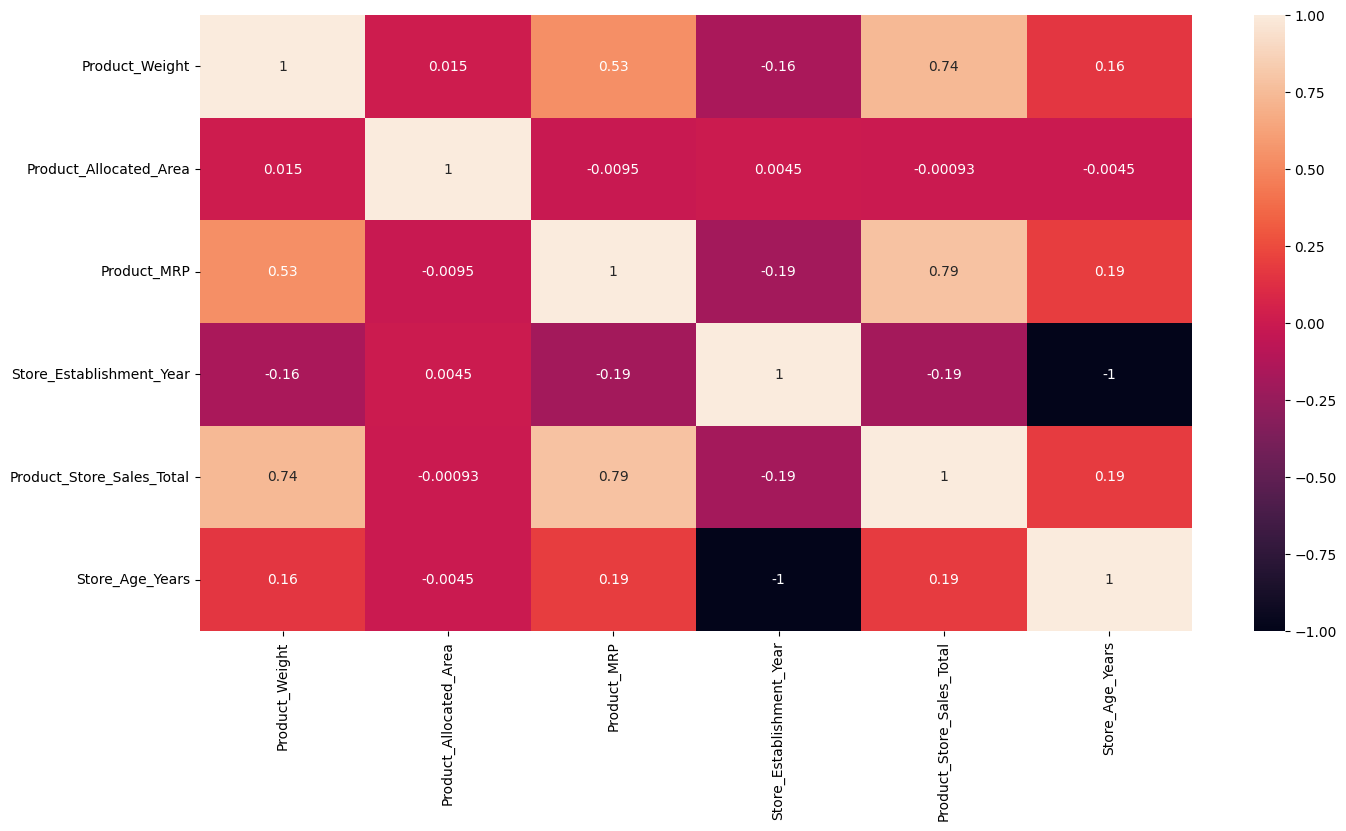

In [45]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(numeric_only = True), annot = True)
plt.show()

**Observation:**
- Nous observons une forte corrélation entre les deux variables Product_Store_Sales_Total et Product_MRP par rapport à Store_Age_Years.

### **Préparation des données pour la modélisation**

- Nous voulons prévoir le total des ventes du magasin de produits.
- Avant de construire un modèle, nous devons encoder les caractéristiques catégorielles et supprimer les colonnes inutiles
- Nous diviserons les données en données de formation et de test afin de pouvoir évaluer le modèle que nous construisons sur les données de formation.

In [46]:
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [47]:
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [48]:
# Séparation des caractéristiques et de la colonne cible
X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [49]:
X.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Age_Years,Product_Sugar_Content_No Sugar,Product_Sugar_Content_Regular,Store_Size_Medium,Store_Size_Small,Store_Location_City_Type_Tier 2,Store_Location_City_Type_Tier 3,Store_Type_Food Mart,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Product_Id_char_FD,Product_Id_char_NC,Product_Type_Category_Périssables
0,12.66,0.027,117.08,16,False,False,True,False,True,False,False,False,True,True,False,False
1,16.54,0.144,171.43,26,False,False,True,False,False,False,False,False,False,True,False,True
2,14.28,0.031,162.08,38,False,True,False,False,True,False,False,True,False,True,False,False
3,12.10,0.112,186.31,38,False,False,False,False,True,False,False,True,False,True,False,False
4,9.57,0.010,123.67,27,True,False,False,True,False,True,True,False,False,False,True,False


In [50]:
y.head()

0    2842.40
1    4830.02
2    4130.16
3    4132.18
4    2279.36
Name: Product_Store_Sales_Total, dtype: float64

In [51]:
X = sm.add_constant(X)

In [52]:
# Division des données en ensembles de données d'entrennaitement et de test dans un rapport de 70-Train:30-Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [53]:
# Suppression de la colonne Store_Age_Years
X_test = X_test.drop('Store_Age_Years',axis = 1)
X_train = X_train.drop('Store_Age_Years',axis = 1)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(train):
    # Make sure we're working with a DataFrame
    train = pd.DataFrame(train.copy())
    
    # Select only numeric columns
    numeric_cols = train.select_dtypes(include=[np.number]).columns
    train = train[numeric_cols]
    
    # Drop rows with NaN or infinite values
    train = train.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Check if we have enough data points (need at least 2 samples)
    if len(train) < 2:
        raise ValueError("Not enough samples after cleaning (need at least 2)")
    
    # Check if we have any columns left
    if train.shape[1] == 0:
        raise ValueError("No numeric columns available for VIF calculation")
    
    # Calculate VIF
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) 
        for i in range(train.shape[1])
    ]
    
    return vif

# Example usage
try:
    print(checking_vif(X_train))
except Exception as e:
    print(f"Error calculating VIF: {e}")

                  feature        VIF
0                   const  40.371146
1          Product_Weight   1.373121
2  Product_Allocated_Area   1.000376
3             Product_MRP   1.373228


## **VI. Construction des modèles de Machine Learning**

Créons une fonction pour calculer les mesures de performance de notre modèle de régression afin de ne pas avoir à utiliser le même code à plusieurs reprises.

In [55]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Performance du modèle sur les données de test et de formation
def model_pref(olsmodel, x_train, x_test):

    # Prédiction sur des données d'entrainement
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prédiction sur des données de test
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [56]:
# Creation du modele
linear_model = LinearRegression()

In [57]:
# Entrainment du modele
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
model_pref(linear_model, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


In [59]:
X_train.shape

(6134, 16)

In [60]:
y_train.shape

(6134,)

In [79]:
def actualVsPredicted(y_pred, y_true=y_test):
    plt.figure(figsize=(10, 6))
    
    # 1. Nuage de points réel vs prédit
    sns.scatterplot(x=y_true, y=y_pred, 
                    color='Blue', 
                    alpha=0.6,
                    label='Predictions')
    
    # 2. Ligne de prédiction parfaite (diagonale)
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 
             'r--', 
             label='Perfect Prediction')
    
    # 3. Régression linéaire (tendance)
    sns.regplot(x=y_true, y=y_pred, 
                scatter=False, 
                color='green',
                line_kws={'linestyle':'--', 'alpha':0.7},
                label='Trend Line')
    
    # 4. Paramètres esthétiques
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'Actual vs Predicted Values\nR² = {r2_score(y_true, y_pred):.3f} | RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.1f}', 
              fontsize=14)
    plt.legend()
    plt.grid(alpha=0.2)
    
    # Ajuster les limites des axes
    buffer = 0.1 * (max_val - min_val)
    plt.xlim(min_val - buffer, max_val + buffer)
    plt.ylim(min_val - buffer, max_val + buffer)
    
    plt.tight_layout()
    plt.show()

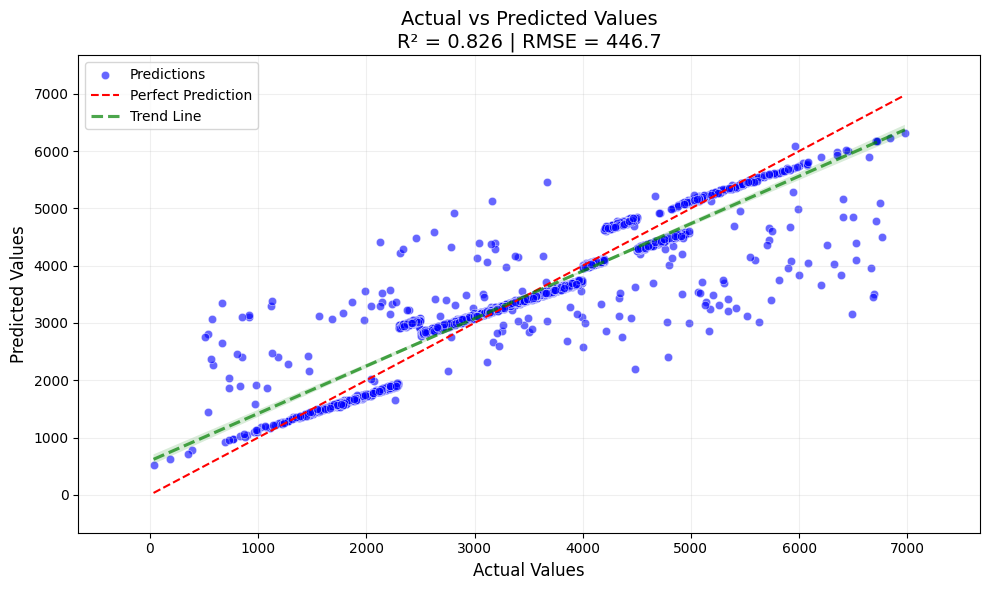

In [80]:
y_pred_test = linear_model.predict(X_test)
actualVsPredicted(y_pred_test,y_test)

In [81]:
y_pred_test

array([3549.62152778, 5736.35630491, 4813.76974836, ..., 3183.36836287,
       3246.06262203, 3432.46816619], shape=(2629,))

In [82]:
y_test.head()

7441    3714.07
6355    5995.91
1271    4419.17
3511    3440.23
1821    4175.82
Name: Product_Store_Sales_Total, dtype: float64

**Observations:**
- The Train and the Test scores are very close to each other so we can say the model is not overfitting. 
- However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

### **Appliquer la validation croisée pour améliorer le modèle et l'évaluer à l'aide de différentes mesures d'évaluation.**

Vérifions les performances du modèle en utilisant la technique de validation croisée de la bibliothèque scikit-learn et voyons si les performances sur les données de formation et de test sont comparables à ce que nous obtenons après la validation croisée des données. 

In [83]:
from sklearn.model_selection import cross_val_score

#  Construction du modèle de régression et procéder à une validation croisée
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
- Après l'application de la validation croisée, le score du modèle s'est amélioré. Nous pouvons le comparer avec les scores des métriques d'évaluation.
- **Cette approche est :**
- Robuste : utilise tous les données d'entraînement
- Fiable : réduit le surapprentissage (overfitting)
- Informative : donne une idée de la variance des performances

## Radom Forest ##

In [84]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
model_pref(model_rf, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train  106.910798   39.646355  0.989460
1   Test  296.299530  111.105222  0.916029


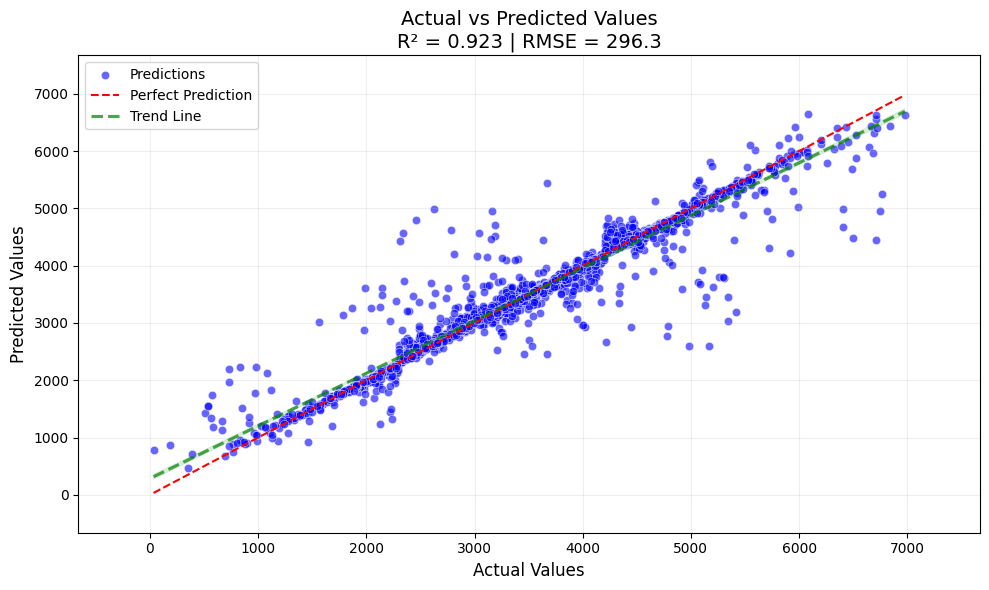

In [87]:
y_pred_test = model_rf.predict(X_test)
actualVsPredicted(y_pred_test,y_test)

## Decision Tree ##

In [88]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [89]:
model_pref(model_dt, X_train, X_test)

    Data        RMSE         MAE        r2
0  Train    0.000000    0.000000  1.000000
1   Test  376.638377  132.632271  0.872642


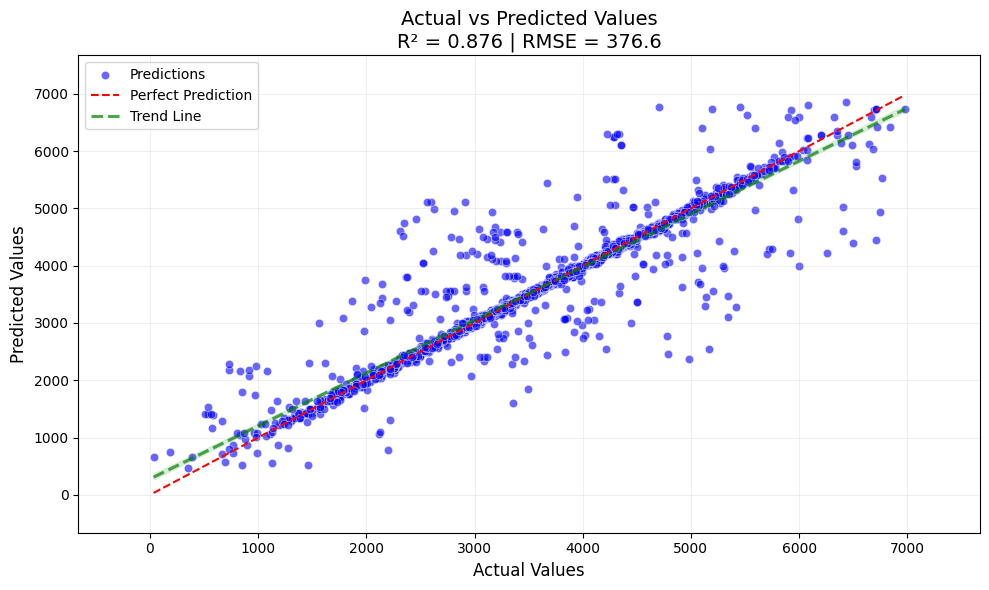

In [91]:
y_pred_test = model_dt.predict(X_test)
actualVsPredicted(y_pred_test,y_test)

## **Conclusion Modèle de Machine Learning**

- Nous pouvons utiliser ce modèle de prédiction pour prévoir les ventes totales qui seront réalisées par SuperKart au cours du prochain trimestre.
- Nous suggérons le modèle de **RandomForest**, ce modèle explique environ **92%** de la variation des données.

# VII. Construction de Reseau de Neuron

In [104]:
# Creation du modele de Reseau de Neuron
model_snn = Sequential()

In [105]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# 1. Normalisation des données (crucial pour la régression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
 #2. Architecture du modèle
model_snn = Sequential([
    Dense(32, input_shape=(16,), activation='relu'),  # Couche cachée
    Dense(1)  # Pas de fonction d'activation pour la régression !
])

# 3. Compilation (avec un learning rate plus bas)
model_snn.compile(
    optimizer=Adam(learning_rate=0.001),  # LR réduit
    loss='mse',                          # Mean Squared Error
    metrics=['mae']                      # Mean Absolute Error (plus parlant)
)

# 4. Résumé
model_snn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
X_train.shape

(6134, 16)

In [108]:
history = model_snn.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test)
)
y_pred_snn = model_snn.predict(X_test_scaled)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_snn)))
print('R2 Score:', r2_score(y_test, y_pred_snn))

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 13009302.0000 - mae: 3450.8328 - val_loss: 13206803.0000 - val_mae: 3473.3792
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13053304.0000 - mae: 3451.3730 - val_loss: 13105376.0000 - val_mae: 3460.2024
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12872721.0000 - mae: 3430.6160 - val_loss: 12918392.0000 - val_mae: 3436.0586
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12652565.0000 - mae: 3400.2263 - val_loss: 12645983.0000 - val_mae: 3400.6995
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 12276714.0000 - mae: 3350.7012 - val_loss: 12302311.0000 - val_mae: 3355.6448
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 11919682.0000 - mae: 3303.8696 - val_loss: 11902728.0000 - val_mae: 3302.3826
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11573779.0000 - mae: 3253.6802 - val_loss: 11455555.0000 - val_mae: 3241.7703
Epoch 8/100
192/192 ━━━━━━━

In [109]:
# Affichage de l'entrainement
epoch_mae = history.history['mae']
epoch_loss = history.history['loss']

epoch_val_mae = history.history['val_mae']
epoch_val_loss = history.history['val_loss']

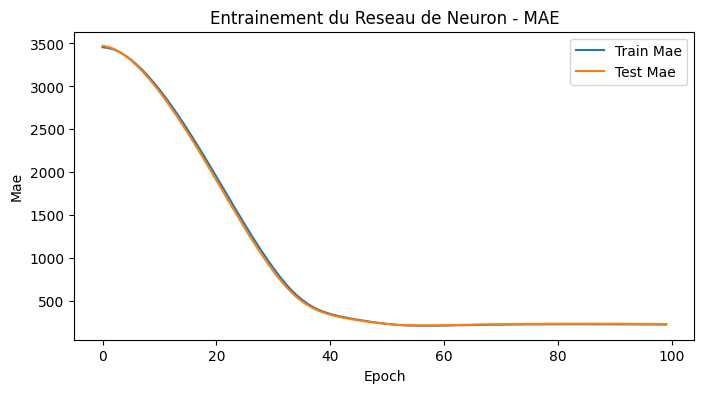

In [110]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_mae)), epoch_mae, label='Train Mae')
plt.plot(range(0, len(epoch_val_mae)), epoch_val_mae, label='Test Mae')
plt.xlabel('Epoch')
plt.ylabel('Mae')
plt.title('Entrainement du Reseau de Neuron - MAE')
plt.legend()
plt.show()

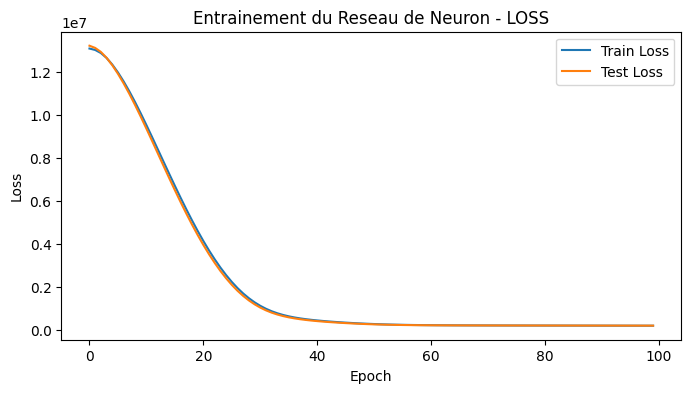

In [111]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Entrainement du Reseau de Neuron - LOSS')
plt.legend()
plt.show()

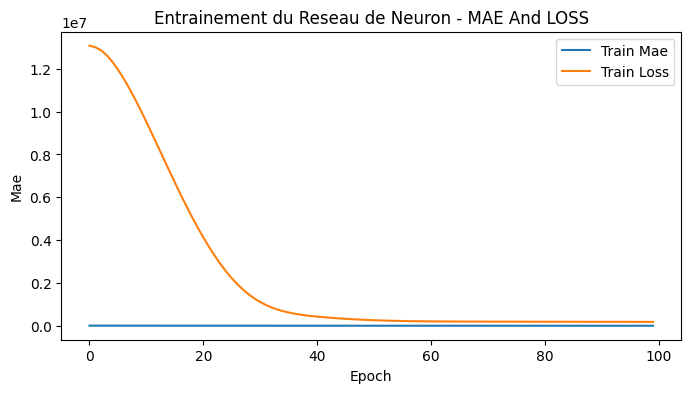

In [112]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_mae)), epoch_mae, label='Train Mae')
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Mae')
plt.title('Entrainement du Reseau de Neuron - MAE And LOSS')
plt.legend()
plt.show()

In [114]:
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [116]:
model_pref(model_rf, X_train_scaled, X_test_scaled)

    Data        RMSE         MAE        r2
0  Train  106.535448   40.001679  0.989572
1   Test  297.453013  111.686587  0.915539


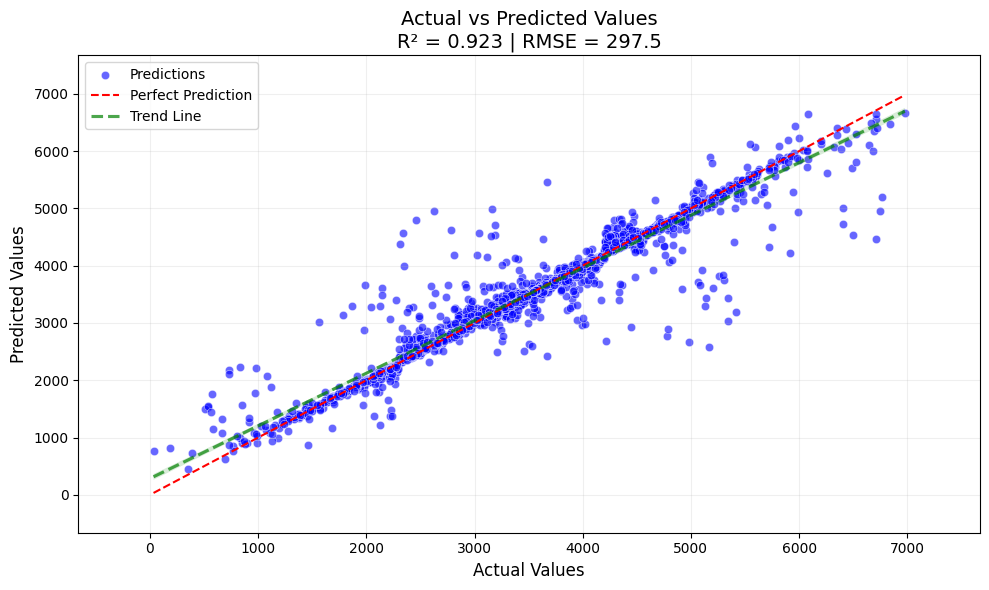

In [117]:
y_pred_test = model_rf.predict(X_test_scaled)
actualVsPredicted(y_pred_test,y_test)

## VIII. Conclusion

En comparant le meileur Modele de Machine Learning et Celui de deep Learning. Nous recommandons l'utilisation du Modele de Machine Learning **Radom Forest dont R2 est de 0.92%** 